<a href="https://colab.research.google.com/github/jeffmatsumoto/msds498/blob/main/G_Sunroof_Phebian_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [1]:
from IPython.display import display
import plotly
import matplotlib.pyplot as plt
#import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

from tabulate import tabulate
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#graph inline
%matplotlib inline

In [ ]:
INFILE_city = "C:\\Users\\la_k_\\OneDrive\\Documents\\Kim School Items\\MSDS 498\\Project\\project-sunroof-city-09082017.csv"
df_city = pd.read_csv(INFILE_city)

INFILE_state = "C:\\Users\\la_k_\\OneDrive\\Documents\\Kim School Items\\MSDS 498\\Project\\project-sunroof-state-09082017.csv"
df_state = pd.read_csv(INFILE_state)


Two functions have been created,

1. missing_value(
This function calculates percentage missing values in the all the columns in the dataframe. It needs the dataframe as input.

2. state_conversion()
This function contains a dictionary of all the USA states with the state abbrevations. It returns the abbrevation. My data didn't had state abbrevations, as I needed it in my analysis.

In [ ]:
def missing_value(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    q = list(percent_missing)
    missing_value_df = pd.DataFrame({'Column Name': df.columns, 'Percent Missing % ': q})
    return missing_value_df

In [ ]:
def state_conversion():
    us_state_abbrev = {
        'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY',
    }
    return us_state_abbrev

In [ ]:
#to display all the columns of the dataframe
pd.options.display.max_columns = None

**Data Info**

In [ ]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   region_name                           51 non-null     object 
 1   state_name                            51 non-null     object 
 2   lat_max                               52 non-null     float64
 3   lat_min                               52 non-null     float64
 4   lng_max                               52 non-null     float64
 5   lng_min                               52 non-null     float64
 6   lat_avg                               52 non-null     float64
 7   lng_avg                               52 non-null     float64
 8   yearly_sunlight_kwh_kw_threshold_avg  52 non-null     float64
 9   count_qualified                       52 non-null     int64  
 10  percent_covered                       52 non-null     float64
 11  percent_qualified    

In [ ]:
#missing value percentage of state data
missing_value(df_state)

,Column Name,Percent Missing %
0,region_name,1.923077
1,state_name,1.923077
2,lat_max,0.000000
3,lat_min,0.000000
4,lng_max,0.000000
5,lng_min,0.000000
6,lat_avg,0.000000
7,lng_avg,0.000000
8,yearly_sunlight_kwh_kw_threshold_avg,0.000000
9,count_qualified,0.000000


In [ ]:
#missing value percentage of city data
missing_value(df_city)

,Column Name,Percent Missing %
0,region_name,0.025221
1,state_name,0.012610
2,lat_max,0.000000
3,lat_min,0.000000
4,lng_max,0.000000
5,lng_min,0.000000
6,lat_avg,0.000000
7,lng_avg,0.000000
8,yearly_sunlight_kwh_kw_threshold_avg,0.012610
9,count_qualified,0.000000


The percentage of values which are missing are 0.3% and these are the columns we are not taking into consideration, except for 'install_size_kw_buckets_json'.

**Data Cleaning**

**State Data**

The state data didn't had state abbreviations in it, so they were added additionally using the state_conversion(). The abbreviations were added in this and only the data containing the abbreviations was selected. Then one duplicated row was dropped.

In [ ]:
df_state['state_abbr'] = df_state['state_name'].map(state_conversion()) #state conversion function
df_state = df_state[df_state.state_abbr.notna()] #handling na
dup = df_state[df_state.state_name.duplicated()]
df_state.drop_duplicates(subset ="state_name", keep = 'first', inplace = True) #dropping duplicates

**City Data**

The city data didn't had state abbreviations in it, so they were added additionally using the state_conversion(). The abbreviations were added in this and only the data containing the abbreviations was selected. The data didn’t contained any duplicate rows.

In [ ]:
df_city['state_abbr'] = df_city['state_name'].map(state_conversion())
df_city = df_city[df_city.state_abbr.notna()]
dup_city = df_city[df_city.duplicated(['region_name','state_name'])]
dup_city

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count,state_abbr
2012,El Cerrito,California,33.854842,33.824962,-117.508420,-117.535574,33.837363,-117.525936,1371.900000,1274,99.507389,90.099010,2803,21061,13048,17883,11954,43.0,66749.0,10.75,16687.25,9.777993e+05,8.629658e+06,4.848233e+06,6.677215e+06,4.620055e+06,16257.966602,2.575296e+07,"[[0,202],[5,375],[10,306],[15,212],[20,86],[25...",7021.055672,60,CA
2032,Elgin,South Carolina,34.683301,34.658050,-80.691356,-80.732485,34.671127,-80.718855,1104.150000,39,31.927711,73.584906,120,576,119,312,528,26.0,1655.0,6.50,413.75,3.423865e+04,1.950814e+05,3.527162e+04,1.007372e+05,1.734702e+05,8570.417603,5.387991e+05,"[[0,13],[5,16],[10,5],[15,2],[20,1],[45,1],[90...",316.300126,0,SC
2205,Fairview,North Carolina,35.207110,35.105138,-80.473259,-80.586437,35.162942,-80.545932,1100.724281,482,75.138122,70.882353,2002,7661,6467,5838,8334,36.0,30302.0,9.00,7575.50,5.727912e+05,2.570456e+06,1.975112e+06,1.818801e+06,2.735552e+06,11196.325757,9.672713e+06,"[[0,110],[5,153],[10,90],[15,43],[20,24],[25,2...",5678.331982,0,NC
2890,Hamilton Township,New Jersey,40.268375,40.137927,-74.590424,-74.752383,40.213567,-74.690483,995.350000,23217,99.060925,77.225253,55773,287806,236696,215302,550047,25.0,1345624.0,6.25,336406.00,1.428327e+07,8.855044e+07,6.696359e+07,5.946498e+07,1.626870e+08,7521.505359,3.919493e+08,"[[0,8003],[5,8544],[10,3462],[15,1442],[20,436...",249068.330623,478,NJ
3072,Highland,Indiana,38.060739,38.033955,-87.550904,-87.578144,38.047485,-87.561087,1025.950000,1471,99.785177,79.171152,3676,22781,17714,18416,1210,38.0,63797.0,9.50,15949.25,9.643819e+05,7.129106e+06,5.042750e+06,5.122597e+06,3.534213e+05,11026.499658,1.861225e+07,"[[0,265],[5,494],[10,385],[15,222],[20,73],[25...",15408.228960,2,IN
3816,Lawrence Township,New Jersey,40.359698,40.240061,-74.669845,-74.762120,40.279889,-74.728446,995.350000,6379,88.608275,77.368102,14891,96086,70435,66044,224513,29.0,471969.0,7.25,117992.25,3.783222e+06,2.915764e+07,1.973272e+07,1.838599e+07,6.595950e+07,8262.631897,1.370191e+08,"[[0,1839],[5,2435],[10,1014],[15,339],[20,120]...",87070.223862,149,NJ
3967,Live Oak,California,39.305215,39.178087,-121.625402,-121.719969,39.265295,-121.665573,1208.696756,107,3.104213,84.920635,1551,1850,1443,1434,3165,44.0,9443.0,11.00,2360.75,4.949260e+05,7.185652e+05,4.979863e+05,5.014992e+05,1.136735e+06,15641.683813,3.349712e+06,"[[0,27],[5,22],[10,16],[15,9],[20,10],[25,4],[...",913.235381,4,CA
4433,Middletown,Pennsylvania,40.662155,40.631978,-75.307315,-75.344338,40.645271,-75.326181,978.350000,2521,99.396783,84.996628,7373,30641,25748,30515,19108,34.0,113385.0,8.50,28346.25,1.847323e+06,9.326804e+06,6.993748e+06,8.398841e+06,5.543731e+06,9534.769580,3.211045e+07,"[[0,520],[5,968],[10,614],[15,243],[20,98],[25...",20404.924553,2,PA
4700,Mountain Park,Georgia,33.870270,33.823090,-84.102462,-84.168675,33.846266,-84.131770,1088.728914,3075,99.884872,70.885201,10256,48512,27392,42226,56218,35.0,184604.0,8.75,46151.00,2.872774e+06,1.545380e+07,8.055719e+06,1.295891e+07,1.833493e+07,10703.291309,5.767613e+07,"[[0,680],[5,1029],[10,608],[15,402],[20,178],[...",34293.422022,2,GA
5583,Plantation,Florida,26.160493,26.093091,-80.197815,-80.329862,26.127057,-80.261729,1135.600000,18205,81.159484,98.145453,262305,340984,267599,339535,637135,73.0,1847558.0,18.25,461889.50,7.937753e+07,1.210270e+08,8.754887e+07,1.111186e+08,2.195062e+08,24169.332886,6.185781e+08,"[[0,1023],[5,2959],[10,3135],[15,3147],[20,276..."

The city data is filtered with 100% qualified region for sunroof

In [ ]:
df_city[df_city['percent_qualified'] == 100.0]
citi = df_city.groupby(by = ['state_name'], axis = 0)['percent_qualified'].count()
citi = pd.DataFrame(citi).reset_index()
citi.sort_values(by= ['percent_qualified'], ascending = False, inplace = True)
citi.head()

,state_name,percent_qualified
4,California,703
37,Pennsylvania,599
8,Florida,571
31,New York,549
42,Texas,414


**Exploratory Data Analysis**

**Statewise Sunlight Received**

A map has been plotted showing the sunlight distribution in all the states. This plot shows which states receive the highest sunlight and which states receive the least. Sunlight is the main power to run solar. From this graph we get the overall distribution.

Then the top 20 states showing the maximum sunlight is shown in the bar graph.

In [ ]:

#choropleth plot

#data to be inputed
data = [go.Choropleth(
    autocolorscale = True,
    locations = df_state.state_abbr,
    z = df_state['yearly_sunlight_kwh_total'],
    locationmode = 'USA-states',
    text = df_state['state_name'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Total Yearly Sunlight (kwh)")
)]

#layout of the map
layout = go.Layout(
    title = go.layout.Title(
        text = 'Statewise Yearly Sunlight Received (kwh)<br>(Hover for Breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
iplot(fig)

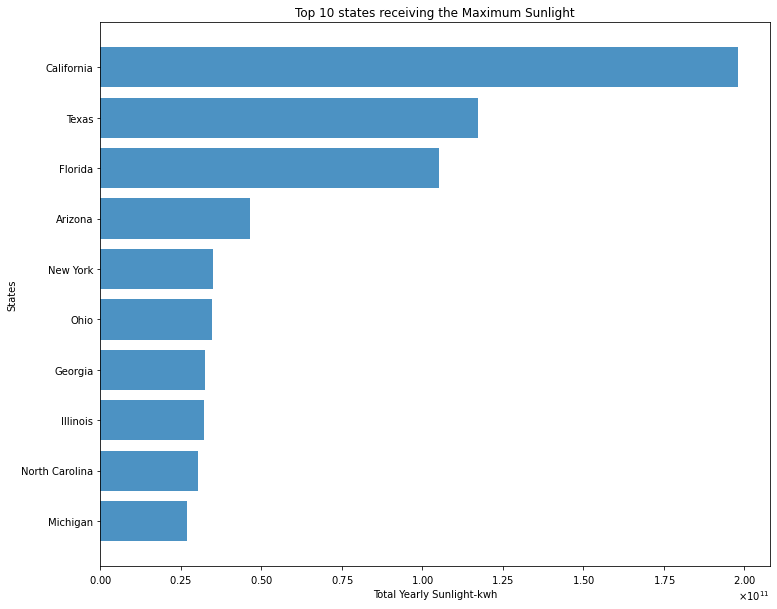

<Figure size 432x288 with 0 Axes>

In [ ]:
df_state.sort_values(by= ['yearly_sunlight_kwh_total', 'state_name'], ascending = False, inplace = True)
plt.figure(figsize=(12,10))
plt.barh(df_state.state_name.head(10),
         df_state.yearly_sunlight_kwh_total.head(10),
         align='center', alpha=0.8)
plt.xlabel('Total Yearly Sunlight-kwh')
plt.ylabel('States')
plt.title('Top 10 states receiving the Maximum Sunlight')
ax = plt.gca()
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.xaxis.set_major_formatter(formatter) 
ax.invert_yaxis()
plt.show()
plt.tight_layout()

**States where the buildings are suitable for solar**

A map has been plotted showing the statewise distribution of buildings which are suitable for solar.
Then the top 20 states are showing the same.

In [ ]:
data = [go.Choropleth(
    autocolorscale = True,
    locations = df_state.state_abbr,
    z = df_state['count_qualified'],
    locationmode = 'USA-states',
    text = df_state['state_name'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Count of No. of Building")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Number of Buildings Qualified for Solar, by State'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
iplot(fig)

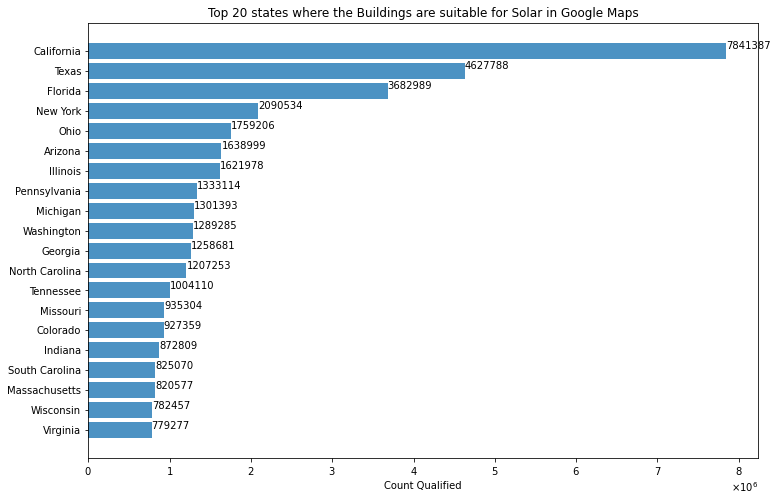

<Figure size 432x288 with 0 Axes>

In [ ]:
df_state.sort_values(by= ['count_qualified', 'state_name'], ascending = False, inplace = True)
plt.figure(figsize=(12,8))
plt.barh(df_state.state_name.head(20),
         df_state.count_qualified.head(20), 
         align='center', alpha=0.8)
plt.xlabel('Count Qualified')
plt.title('Top 20 states where the Buildings are suitable for Solar in Google Maps')
ax = plt.gca()

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.xaxis.set_major_formatter(formatter) 

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.1, i.get_y()+0.31, \
            str(round((i.get_width()), 2)), color='black')
ax.invert_yaxis()
plt.show()
plt.tight_layout()

**States with the most suitable regions qualified for sunroof**

This plot shows, top 20 state containing the most suitable regions for solar panel installation.

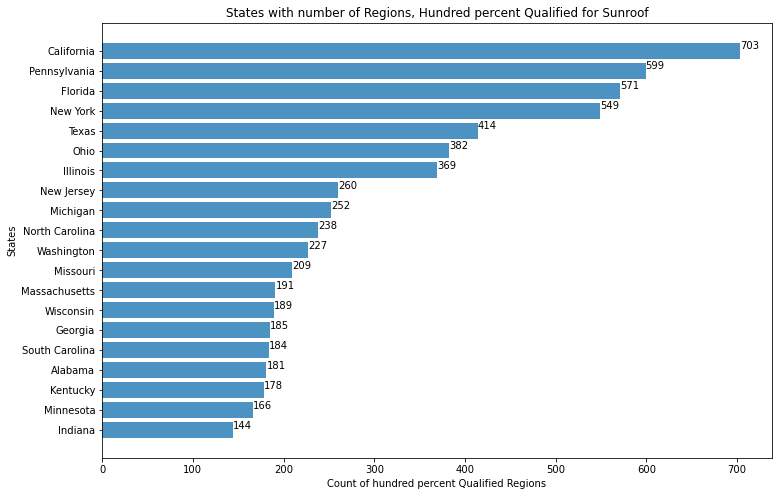

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,8))
plt.barh(citi.state_name.head(20),
         citi.percent_qualified.head(20),
         align='center', alpha=0.8)
plt.xlabel('Count of hundred percent Qualified Regions')
plt.ylabel('States')
plt.title('States with number of Regions, Hundred percent Qualified for Sunroof')
ax = plt.gca()
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.1, i.get_y()+0.31, \
            str(round((i.get_width()), 2)), color='black')
ax.invert_yaxis()
plt.show()
plt.tight_layout()

**States with Maximum number of solar panels possible**

This plot shows the states with maximum number of solar panel installations.

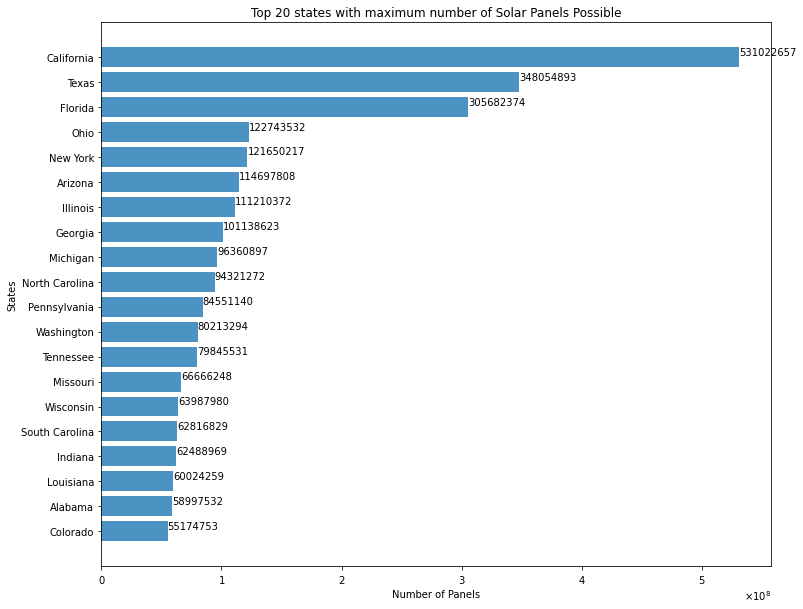

<Figure size 432x288 with 0 Axes>

In [ ]:
df_state.sort_values(by= ['number_of_panels_total', 'state_name'], ascending = False, inplace = True)
plt.figure(figsize=(12,10))
plt.barh(df_state.state_name.head(20),
         df_state.number_of_panels_total.head(20),
         align='center', alpha=0.8)
plt.xlabel('Number of Panels')
plt.ylabel('States')
plt.title('Top 20 states with maximum number of Solar Panels Possible')
ax = plt.gca()
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.1, i.get_y()+0.31, \
            str(round((i.get_width()), 2)), color='black')
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.xaxis.set_major_formatter(formatter) 
ax.invert_yaxis()
plt.show()
plt.tight_layout()

**Carbon Offset Potential**

A carbon offset is an investment in an activity that reduces carbon emissions. The reduction in carbon emissions is represented by a carbon credit. The credit, usually verified by a third party, signifies that greenhouse gas emissions are lower than they would have been had no one invested in the offset. One credit equals one metric ton of carbon dioxide prevented from entering the atmosphere. The credit purchaser can use the credit for carbon accounting. l we can power our operations entirely with renewables or reduce our emissions in other ways, we can use the offsets to fund projects that reduce greenhouse gas emissions, indirectly reducing our total carbon footprint. When we apply that credit to our carbon footprint, it offsets our emissions from using non-renewable energy.

There are many projects which will lead to carbon offsets. Using solar panel is one of them. We will plotting the top 50 cities where the carbon offset potential is the maximum.

In [ ]:
df_city.sort_values(by= ['carbon_offset_metric_tons'], ascending = False, inplace = True)

tt = df_city['region_name'].apply(str)+'<br>'+'Carbon offset(metric tons): ' + df_city['carbon_offset_metric_tons'].apply(str)
#limits = [(0,1000),(1000,10000),(10000,100000),(100000,1000000),(1000000,10000000)]
limits =[(0,10000000)]
colors = ["rgb(255,133,27)"]
#colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
cities = []
scale = 5000

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df_city[lim[0]:lim[1]]
    city = go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lng_avg'].head(50),
        lat = df_sub['lat_avg'].head(50),
        text = tt,
        marker = go.scattergeo.Marker(
            size = df_sub['carbon_offset_metric_tons']/1e4,
            color = colors[i],
            line = go.scattergeo.marker.Line(
                width=0.5, color='rgb(40,40,40)'
            ),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

layout = go.Layout(
        title = go.layout.Title(
            text = 'Top 50 Cities with Potential carbon Offset<br>(Hover for Break Down)'
        ),
        showlegend = False,
        geo = go.layout.Geo(
            scope = 'usa',
            projection = go.layout.geo.Projection(
                type='albers usa'
            ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )

fig = go.Figure(data=cities, layout=layout)
iplot(fig, filename='d3-bubble-map-populations')

**Steps to increase Carbon Offset**

The carbon offset can be increased, considering solar panels System; by increasing the solar panels. We will see the states which contains the maximum carbon offset potential regions and then we will see how many solar panels can be installed in the ranges of 0 kW to 8 mW.

In [ ]:
df_city = df_city[df_city.carbon_offset_metric_tons.notna()]

#getting the city where Carbon Offset Potential is max
carbon = df_city.groupby(by = ['state_name'], axis = 0)['carbon_offset_metric_tons'].sum() 
carb = pd.DataFrame(carbon).reset_index()
carb.sort_values(by= ['carbon_offset_metric_tons'], ascending = False, inplace = True)
carb.head(10)

,state_name,carbon_offset_metric_tons
42,Texas,5.779106e+07
8,Florida,5.509479e+07
4,California,5.425624e+07
34,Ohio,2.775254e+07
12,Illinois,2.648314e+07
21,Michigan,2.085491e+07
2,Arizona,1.973379e+07
9,Georgia,1.880518e+07
41,Tennessee,1.835439e+07
32,North Carolina,1.732582e+07


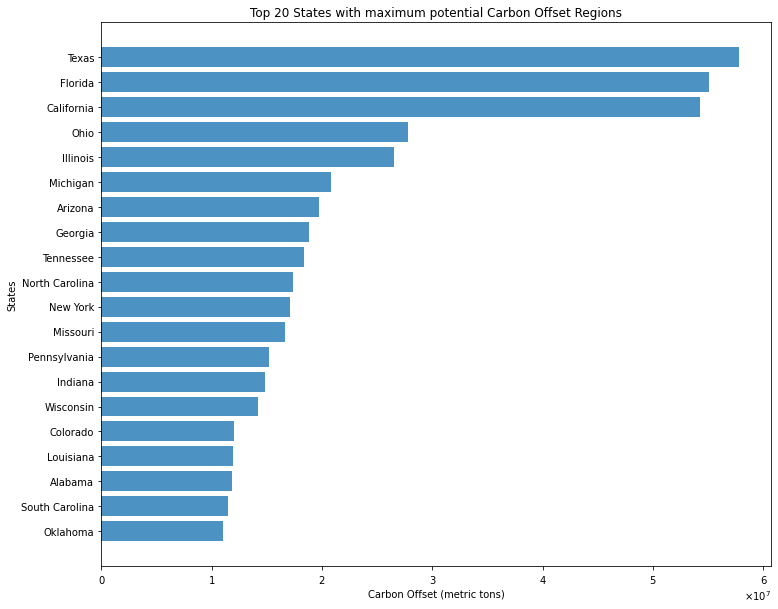

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,10))
#barplot
plt.barh(carb.state_name.head(20),
         carb.carbon_offset_metric_tons.head(20),
         align='center', alpha=0.8)
plt.xlabel('Carbon Offset (metric tons)')
plt.ylabel('States')
plt.title('Top 20 States with maximum potential Carbon Offset Regions')
ax = plt.gca()
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.xaxis.set_major_formatter(formatter) 
ax.invert_yaxis()
plt.show()
plt.tight_layout()

Converting the 'install_size_kw_buckets_json' into bucket ranges from 0 kW to 8mW for top three states, Texas, Florida, California from the above plot.

In [ ]:
import json
#for texas data
df_texas = df_state[df_state['state_name'] == 'Texas']
df_texas
#loading json data
bucket_texas = df_texas['install_size_kw_buckets_json'].apply(json.loads) 
#converting into list
buckets_texas = list(bucket_texas)
#converting into dataframe
buckpd_texas = pd.DataFrame(buckets_texas).reset_index(drop=True) 
buckpd_texas.dropna(inplace =True)
buckpd_texas_melt = pd.melt(buckpd_texas) #converting into one column

buckpd_texas_melt[['bucket_kW','no_of_buildings']] = pd.DataFrame(buckpd_texas_melt.value.values.tolist(), 
                                                                  index= buckpd_texas_melt.index)
#converting into ranges
bins = pd.cut(buckpd_texas_melt['bucket_kW'], [0, 100, 1000]) 
tx = buckpd_texas_melt.groupby(bins)['bucket_kW'].agg(['count', 'sum'])
tx.columns = ['count_tx','sum_tx']
tx['range'] = ['0 - 100', '100 - 1000']
tx

,count_tx,sum_tx,range
bucket_kW,,,
"(0, 100]",20,1050,0 - 100
"(100, 1000]",180,99450,100 - 1000


In [ ]:

#for florida
df_florida = df_state[df_state['state_name'] == 'Florida']

bucket_florida = df_florida['install_size_kw_buckets_json'].apply(json.loads)
buckets_florida = list(bucket_florida)
buckpd_florida = pd.DataFrame(buckets_florida).reset_index(drop=True)
buckpd_florida.dropna(inplace =True)
buckpd_florida_melt = pd.melt(buckpd_florida)

buckpd_florida_melt[['bucket_kW','no_of_buildings']] = pd.DataFrame(buckpd_florida_melt.value.values.tolist(), 
                                                                  index= buckpd_florida_melt.index)
bins = pd.cut(buckpd_florida_melt['bucket_kW'], [0, 100, 1000])
fl = buckpd_florida_melt.groupby(bins)['bucket_kW'].agg(['count', 'sum'])
fl.columns = ['count_fl','sum_fl']
fl['range'] = ['0 - 100', '100 - 1000']
fl

,count_fl,sum_fl,range
bucket_kW,,,
"(0, 100]",20,1050,0 - 100
"(100, 1000]",180,99450,100 - 1000


In [ ]:

#for california
df_cali = df_state[df_state['state_name'] == 'California']

bucket_cali = df_cali['install_size_kw_buckets_json'].apply(json.loads)
buckets_cali = list(bucket_cali)
buckpd_cali = pd.DataFrame(buckets_cali).reset_index(drop=True)
buckpd_cali.dropna(inplace =True)
buckpd_cali_melt = pd.melt(buckpd_cali)

buckpd_cali_melt[['bucket_kW','no_of_buildings']] = pd.DataFrame(buckpd_cali_melt.value.values.tolist(), 
                                                                  index= buckpd_cali_melt.index)
bins = pd.cut(buckpd_cali_melt['bucket_kW'], [0, 100, 1000])
ca = buckpd_cali_melt.groupby(bins)['bucket_kW'].agg(['count', 'sum'])
ca.columns = ['count_ca','sum_ca']
ca['range'] = ['0 - 100', '100 - 1000']
ca

,count_ca,sum_ca,range
bucket_kW,,,
"(0, 100]",20,1050,0 - 100
"(100, 1000]",180,99450,100 - 1000


In [ ]:
#merging into one
df_txfl = pd.merge(tx,fl)
df_merged = pd.merge(ca,df_txfl)
df_merged

,count_ca,sum_ca,range,count_tx,sum_tx,count_fl,sum_fl
0,20,1050,0 - 100,20,1050,20,1050
1,180,99450,100 - 1000,180,99450,180,99450


The following plot shows the ranges of the solar panel system available in the top three states with maximum carbon offset potential regions. When the maximum solar panels are installed irrespective of the solar panel sizes, the carbon offset is possible. Depending upon the data from google, we have the following bins of solar panels. These are just top three states, if we consider installation of solar panel in entire USA, the carbon offset potential will surely increase. For the top three states, the maximum solar panels can be installed in 1 - 5 mW ranges.

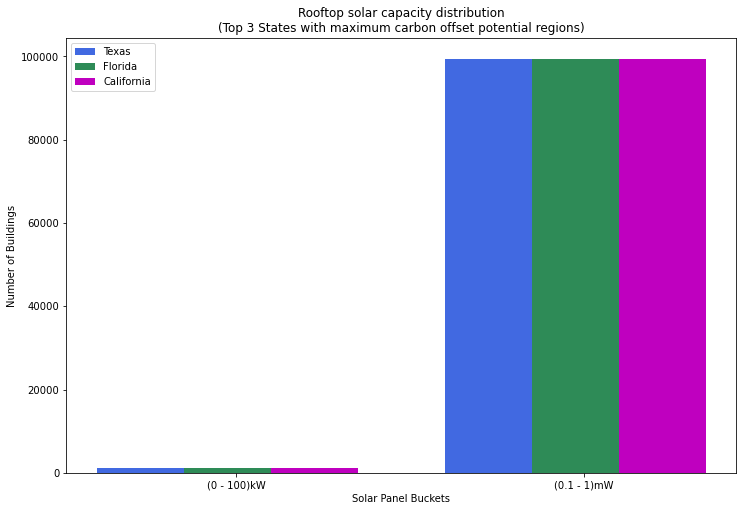

In [ ]:

N = 2

ind = np.arange(N) # the x locations for the groups
width = 0.25       # the width of the bars

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, df_merged['sum_tx'], width, color='royalblue')

rects2 = ax.bar(ind+width, df_merged['sum_fl'], width, color='seagreen')

rects3 = ax.bar(ind+width+width, df_merged['sum_ca'], width, color='m')

# add some
ax.set_xlabel('Solar Panel Buckets')
ax.set_ylabel('Number of Buildings')
ax.set_title('Rooftop solar capacity distribution\n(Top 3 States with maximum carbon offset potential regions)')
ax.set_xticks(ind + width +width /10)
ax.set_xticklabels( ['(0 - 100)kW', '(0.1 - 1)mW'] )

ax.legend( (rects1[0], rects2[0], rects3[0]), ('Texas', 'Florida', 'California') )


plt.show()